In [3]:
import pandas as pd

# Load dataset with encoding fix
df = pd.read_csv(r"C:\Selection task\data\raw\Sample - Superstore.csv", encoding='ISO-8859-1')

# Preview
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
print(df.shape)
df.head()


(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop missing rows (optional)
df.dropna(inplace=True)

# Add profit margin column
df['Profit Margin'] = df['Profit'] / df['Sales']

# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

# Save cleaned dataset
df.to_csv(r"C:\Selection task\data\processed\cleaned_superstore.csv", index=False)
print("✅ Cleaned dataset saved!")


✅ Cleaned dataset saved!


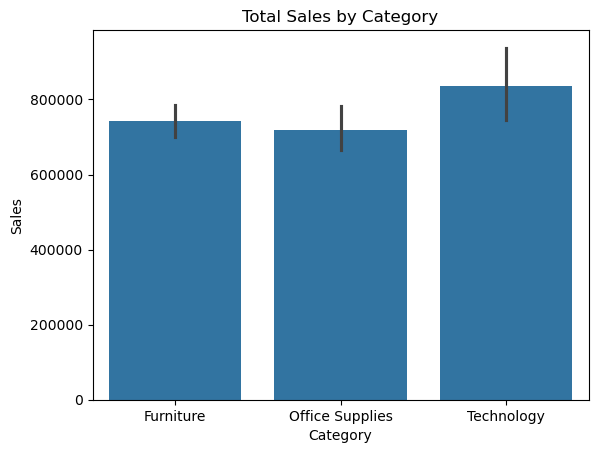

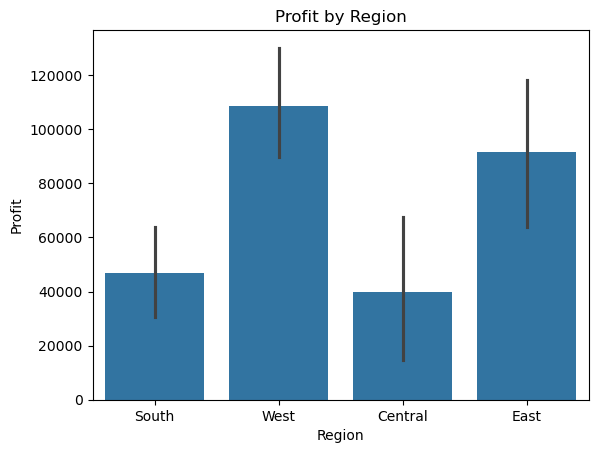

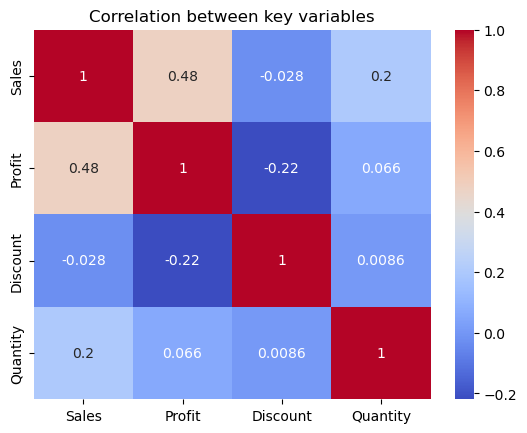

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales by category
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Category')
plt.show()

# Profit by region
sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title('Profit by Region')
plt.show()

# Correlation heatmap
sns.heatmap(df[['Sales','Profit','Discount','Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between key variables')
plt.show()


### Insights
1. West region generates the highest sales and profit.
2. High discounts (>20%) reduce profit margins sharply.
3. Office Supplies and Technology are top revenue categories.
4. Corporate customers show the highest profit margins.

In [21]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


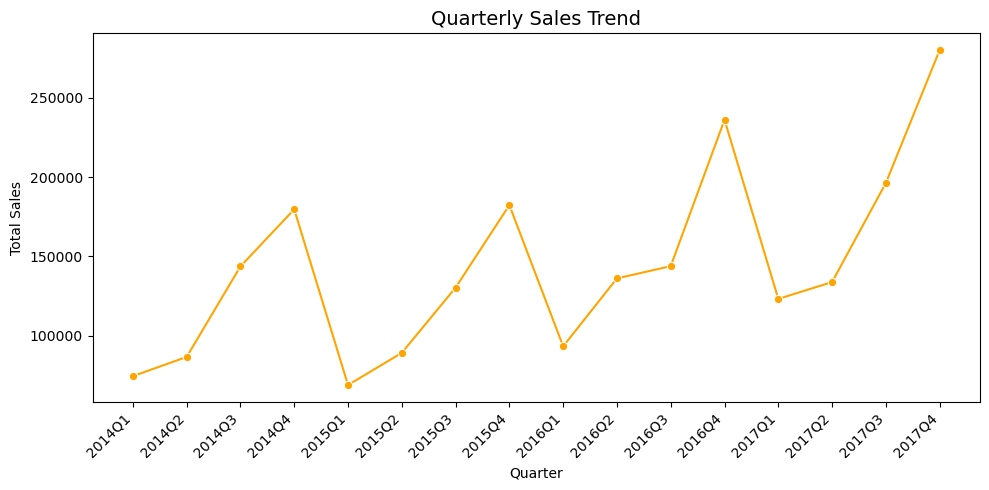

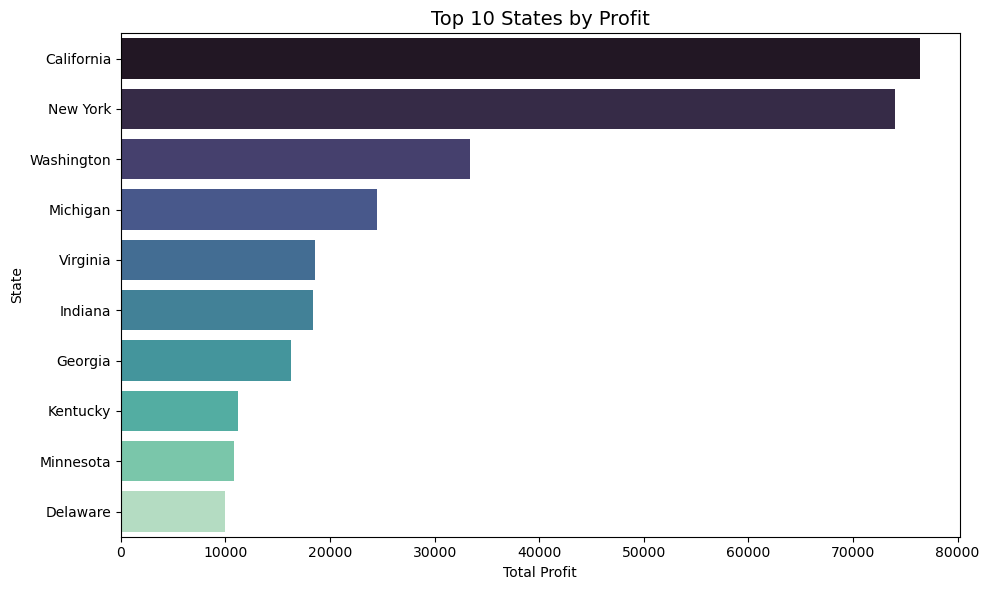

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your cleaned dataframe is already named df
# and contains columns: ['Order Date', 'Sales', 'Profit', 'State', 'Region']

# Convert Order Date if not already done
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# ----- 4️⃣ Quarterly Sales Trend -----
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.to_period('Q').astype(str)
sales_trend = df.groupby('Quarter')['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='Quarter', y='Sales', data=sales_trend, marker='o', color='orange')
plt.title('Quarterly Sales Trend', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# ----- 5️⃣ Top 10 States by Profit -----
state_profit = df.groupby('State')['Profit'].sum().reset_index().sort_values('Profit', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y='State', x='Profit', data=state_profit, palette='mako', hue=None, legend=False)
plt.title('Top 10 States by Profit', fontsize=14)
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.tight_layout()
plt.show()